# Heatmap - Pos&Neg

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

In [2]:
data = pd.read_excel("Data/dEX Team Survey.xlsx") 
data.head()

,ID,Start time,Completion time,Email,Name,How happy are you at work?,How likely are you to recommend your friend or colleague to work here?,Do you feel you are driving value for GC?,Do you feel like dEX team members give each other respect?,How frequently do you receive feedback/recognition from your team leaders?,...,How comfortable do you feel giving feedback to your colleagues OUTSIDE of dEX team,Do you and your colleagues OUTSIDE of dEX team work to achieve the same goals?,How comfortable do you feel giving feedback to your colleagues WITHIN dEX team?,How comfortable are you to openly consult both your professional and personal issues with dEX team members?,Are you fully empowered and accountable for the work that you do?,Do you have the right capabilities and skillets to reach your full potential?,Are you satisfy with level of comfort in your physical work space?,Do you feel that you maintain a healthy balance between your work and personal life?,"Hypothetically, if you were to quit tomorrow, what would your reason be? (Please select one)",Total Score
0,1,2019-06-05 15:17:38,2019-06-05 15:20:47,anonymous,NaN,8,5,7,9,8,...,8,4,9,10,8,9,9,5,Team leaders (VP & DM),109
1,2,2019-06-05 15:22:08,2019-06-05 15:24:30,anonymous,NaN,7,7,7,6,5,...,8,8,7,8,8,9,9,8,Need to get more challenge,104
2,3,2019-06-05 15:26:55,2019-06-05 15:30:23,anonymous,NaN,7,7,8,8,8,...,6,7,8,8,9,7,6,7,Colleagues,103
3,4,2019-06-05 15:40:57,2019-06-05 15:44:18,anonymous,NaN,3,7,5,7,8,...,6,8,3,3,4,3,4,3,Job responsibility,72
4,5,2019-06-05 15:03:34,2019-06-05 15:55:58,anonymous,NaN,4,0,2,2,5,...,3,7,1,0,10,4,0,0,Team leaders (VP & DM),40


In [3]:
data.drop(["ID","Start time", "Completion time", "Email","Name","Hypothetically, if you were to quit tomorrow, what would your reason be? (Please select one)","Total Score"], axis=1,inplace=True)
#yourdf.drop(['columnheading1', 'columnheading2'], axis=1, inplace=True)

In [4]:
data.head()

,How happy are you at work?,How likely are you to recommend your friend or colleague to work here?,Do you feel you are driving value for GC?,Do you feel like dEX team members give each other respect?,How frequently do you receive feedback/recognition from your team leaders?,Do you feel your team leaders are someone you can trust?,How comfortable do you feel giving feedback to your colleagues OUTSIDE of dEX team,Do you and your colleagues OUTSIDE of dEX team work to achieve the same goals?,How comfortable do you feel giving feedback to your colleagues WITHIN dEX team?,How comfortable are you to openly consult both your professional and personal issues with dEX team members?,Are you fully empowered and accountable for the work that you do?,Do you have the right capabilities and skillets to reach your full potential?,Are you satisfy with level of comfort in your physical work space?,Do you feel that you maintain a healthy balance between your work and personal life?
0,8,5,7,9,8,10,8,4,9,10,8,9,9,5
1,7,7,7,6,5,7,8,8,7,8,8,9,9,8
2,7,7,8,8,8,7,6,7,8,8,9,7,6,7
3,3,7,5,7,8,8,6,8,3,3,4,3,4,3
4,4,0,2,2,5,2,3,7,1,0,10,4,0,0


In [5]:
moddata = data.apply(lambda x : x-5)

In [6]:
moddata.head()

,How happy are you at work?,How likely are you to recommend your friend or colleague to work here?,Do you feel you are driving value for GC?,Do you feel like dEX team members give each other respect?,How frequently do you receive feedback/recognition from your team leaders?,Do you feel your team leaders are someone you can trust?,How comfortable do you feel giving feedback to your colleagues OUTSIDE of dEX team,Do you and your colleagues OUTSIDE of dEX team work to achieve the same goals?,How comfortable do you feel giving feedback to your colleagues WITHIN dEX team?,How comfortable are you to openly consult both your professional and personal issues with dEX team members?,Are you fully empowered and accountable for the work that you do?,Do you have the right capabilities and skillets to reach your full potential?,Are you satisfy with level of comfort in your physical work space?,Do you feel that you maintain a healthy balance between your work and personal life?
0,3,0,2,4,3,5,3,-1,4,5,3,4,4,0
1,2,2,2,1,0,2,3,3,2,3,3,4,4,3
2,2,2,3,3,3,2,1,2,3,3,4,2,1,2
3,-2,2,0,2,3,3,1,3,-2,-2,-1,-2,-1,-2
4,-1,-5,-3,-3,0,-3,-2,2,-4,-5,5,-1,-5,-5


In [7]:
corrmat = moddata.corr() 
corrmat

,How happy are you at work?,How likely are you to recommend your friend or colleague to work here?,Do you feel you are driving value for GC?,Do you feel like dEX team members give each other respect?,How frequently do you receive feedback/recognition from your team leaders?,Do you feel your team leaders are someone you can trust?,How comfortable do you feel giving feedback to your colleagues OUTSIDE of dEX team,Do you and your colleagues OUTSIDE of dEX team work to achieve the same goals?,How comfortable do you feel giving feedback to your colleagues WITHIN dEX team?,How comfortable are you to openly consult both your professional and personal issues with dEX team members?,Are you fully empowered and accountable for the work that you do?,Do you have the right capabilities and skillets to reach your full potential?,Are you satisfy with level of comfort in your physical work space?,Do you feel that you maintain a healthy balance between your work and personal life?
How happy are you at work?,1.000000,0.811841,0.578752,0.701588,0.791630,0.845393,0.503310,0.473628,0.611213,0.634682,0.785778,0.914480,0.452930,0.422127
How likely are you to recommend your friend or colleague to work here?,0.811841,1.000000,0.638411,0.694707,0.825823,0.894828,0.526016,0.616996,0.497971,0.565218,0.511059,0.752331,0.446945,0.463137
Do you feel you are driving value for GC?,0.578752,0.638411,1.000000,0.510947,0.379445,0.480648,0.429956,0.032686,0.531548,0.670295,0.249665,0.607665,0.686209,0.759811
Do you feel like dEX team members give each other respect?,0.701588,0.694707,0.510947,1.000000,0.656766,0.792257,0.711613,0.281495,0.776821,0.704107,0.296058,0.563690,0.550621,0.489762
How frequently do you receive feedback/recognition from your team leaders?,0.791630,0.825823,0.379445,0.656766,1.000000,0.903232,0.419788,0.564081,0.373443,0.351388,0.629655,0.702693,0.140782,0.088880
Do you feel your team leaders are someone you can trust?,0.845393,0.894828,0.480648,0.792257,0.903232,1.000000,0.577456,0.549214,0.534803,0.587417,0.542144,0.777569,0.417431,0.277199
How comfortable do you feel giving feedback to your colleagues OUTSIDE of dEX team,0.503310,0.526016,0.429956,0.711613,0.419788,0.577456,1.000000,0.317870,0.805594,0.729299,0.196768,0.457057,0.567336,0.417378
Do you and your colleagues OUTSIDE of dEX team work to achieve the same goals?,0.473628,0.616996,0.032686,0.281495,0.564081,0.549214,0.317870,1.000000,0.166103,0.105522,0.590308,0.491914,0.006963,-0.063941
How comfortable do you feel giving feedback to your colleagues WITHIN dEX team?,0.611213,0.497971,0.531548,0.776821,0.373443,0.534803,0.805594,0.166103,1.000000,0.885373,0.271873,0.520035,0.600028,0.543904
How comfortable are you to openly consult both your professional and personal issues with dEX team members?,0.634682,0.565218,0.670295,0.704107,0.351388,0.587417,0.729299,0.105522,0.885373,1.000000,0.207707,0.571336,0.802714,0.693951


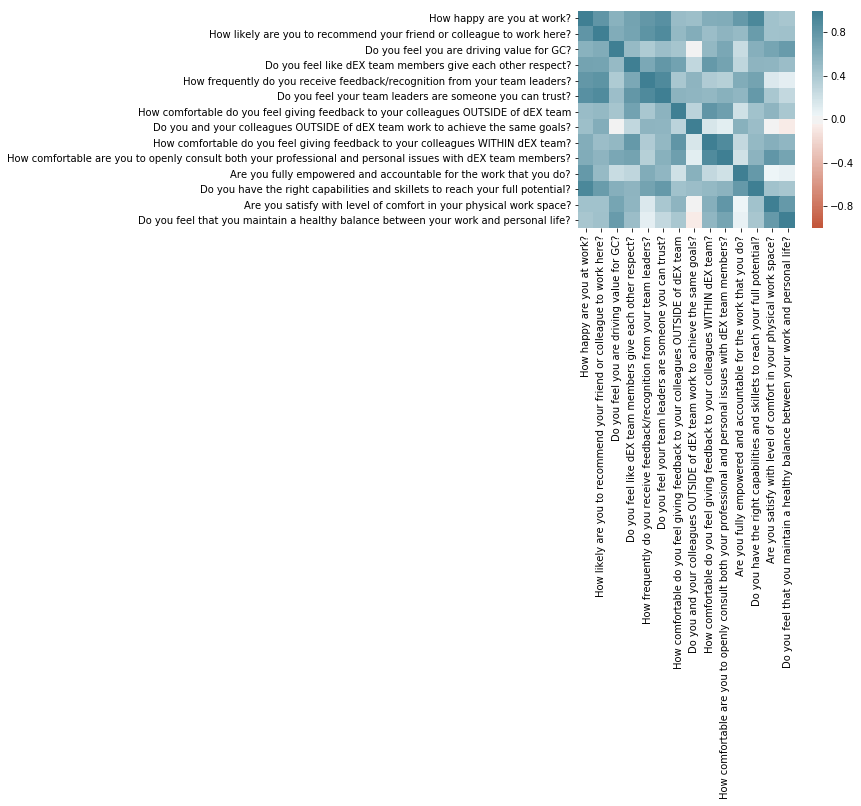

In [8]:
corrmat = moddata.corr() 
  
#f, ax = plt.subplots(figsize =(9, 8)) 
#sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

ax = sns.heatmap(
    corrmat, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
);

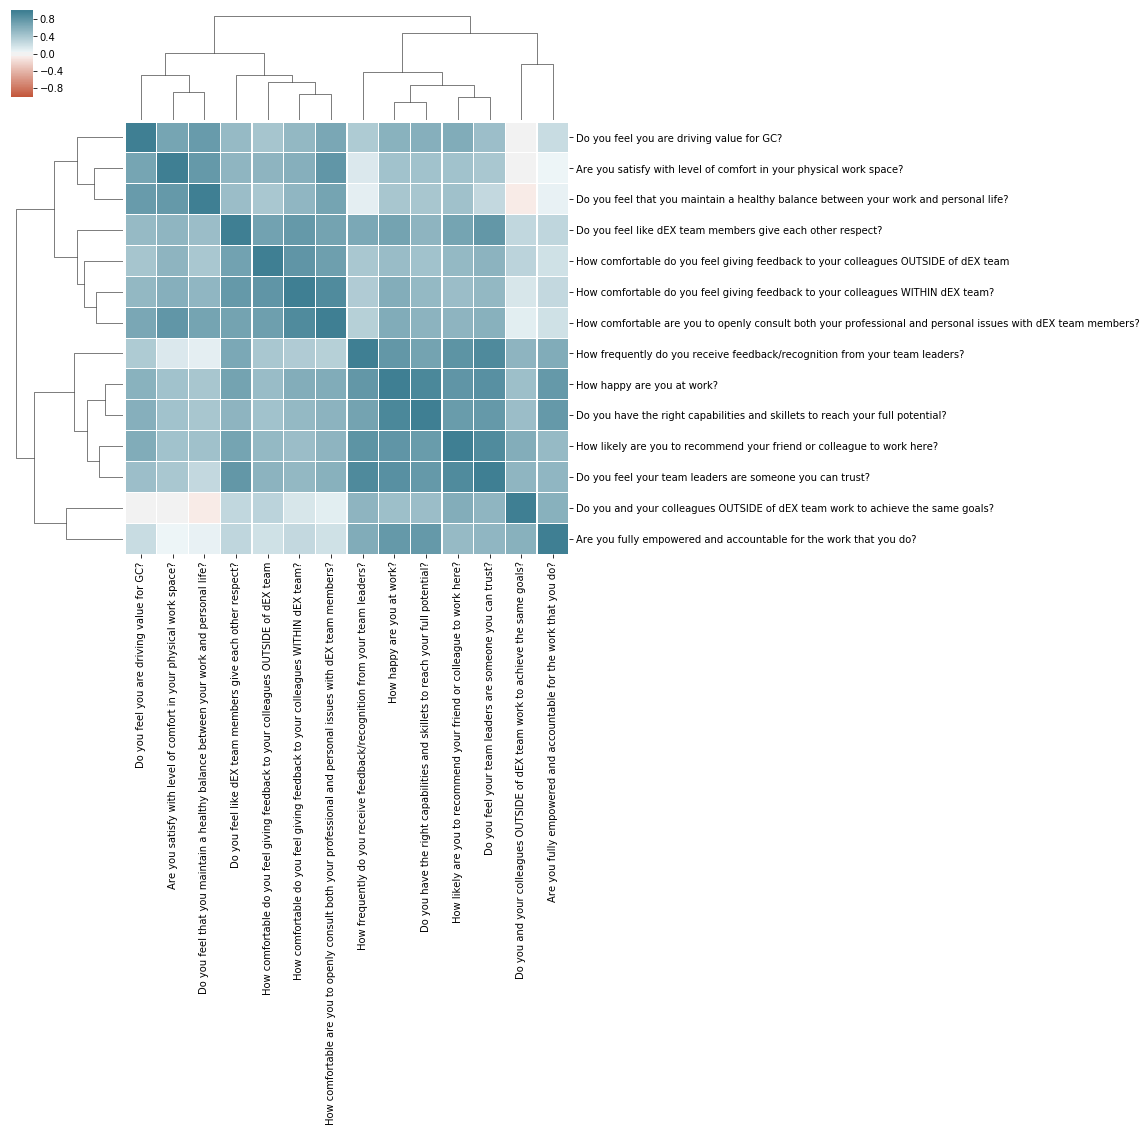

In [9]:
corrmat = moddata.corr() 
  
cg = sns.clustermap(
    corrmat, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200), 
    linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 